In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from Bandit import Bandit
from logs import CustomFormatter 
from abc import ABC, abstractmethod
import warnings
import os


In [2]:
warnings.filterwarnings("ignore")

In [3]:

from Bandit import Visualization
class Bandit(ABC):
    @abstractmethod
    def __init__(self, p):
        pass

    @abstractmethod
    def __repr__(self):
        pass

    @abstractmethod
    def pull(self):
        pass

    @abstractmethod
    def update(self):
        pass

    @abstractmethod
    def experiment(self):
        pass

    @abstractmethod
    def report(self):
        pass

class EpsilonGreedyBandit(Bandit):
    """
    class EpsilonGreedyBandit. 
    
    Represents a epsilon greedy bandit with the following attributes and methods.
    
    Attributes:
    
        reward (float): The true reward of the bandit.
   
    Methods:
        report(path_to_save: str, to_save: bool): Prints the report of the experiment.
        pull(): Pulls a value for the bandit.
        update(x: float): Updates the estimated reward of the bandit.
        experiment(bandit_rewards: list, num_trials: int, path_to_save: str, to_save: bool): Run the experiment with given bandits, number of trials and whether to save the results or not.
        
    
    """
    def __init__(self, p):
        self.expected_reward = p
        self.reward_estimate = 0.
        self.N = 0  # Number of times the bandit was chosen
        self.epsilon = 1  # Epsilon value for exploration-exploitation
        self.learning_process = []  # Tracking estimated reward over time
        self.rewards = []  # Storing rewards for each pull
        # Initialize an empty list for results collection
        self.results = []
        


    def __repr__(self):
        return f'EpsilonGreedyBandit(expected_reward={self.expected_reward}, estimate={self.reward_estimate})'

    def pull(self):
        """Return a normally distributed random reward based on the true reward."""
        # Simulating pulling the bandit and getting a reward
        reward = np.random.normal(self.expected_reward, 1)
        self.rewards.append(reward)
        return reward

    def update(self, x):
        """Update the estimated reward based on the observed reward x."""
        self.N += 1
        self.reward_estimate = ((self.N - 1) * self.reward_estimate + x) / self.N
        self.learning_process.append(self.reward_estimate)

    def update_epsilon(self, current_trial):
        """Updates the epsilon value based on the current trial number."""
        # Update the epsilon value for exploration-exploitation balance
        self.epsilon = 1 / (current_trial + 1)

    def experiment(self, bandit_rewards, num_trials, path_to_save=''):
        for i in range(num_trials):
            if np.random.random() < self.epsilon:
                index = np.random.randint(len(bandit_rewards))
            else:
                index = np.argmax([b.reward_estimate for b in bandit_rewards])
    
            selected_bandit = bandit_rewards[index]
            reward = selected_bandit.pull()
    
            self.results.append({'Bandit': index, 'Reward': reward, 'Algorithm': 'EpsilonGreedy'})
    
        if path_to_save:
            self.save_results(path_to_save)

    def report(self, path_to_save='', to_save=False):
        average_reward = np.mean(self.rewards)
        print(f'Average Reward: {average_reward}')
        # Implement logic for average regret if applicable

        if to_save and path_to_save:
            # Ensure data is already saved in experiment method, so this might not be needed here
            pass
    def save_results(self, path_to_save):
        df = pd.DataFrame(self.results)
        df.to_csv(path_to_save, index=False)
        print(f'Results saved to {path_to_save}')
    
    # Example usage
if __name__ == "__main__":
    NumberOfTrials = 20000
    Bandit_Reward = [1,2,3,4]  # Example expected reward
    path_to_save = os.getcwd()+'/data/epsilon_greedy.csv'  

    # Creating an instance of the EpsilonGreedyBandit class
    epsilon_bandit = EpsilonGreedyBandit(Bandit_Reward[0])
    
    # Running the experiment
    epsilon_bandit.experiment([EpsilonGreedyBandit(p) for p in Bandit_Reward], NumberOfTrials, path_to_save)



Results saved to /Users/lusine.aghinyan/Desktop/AghinyanLusineHW2/data/epsilon_greedy.csv


In [4]:
import numpy as np
import pandas as pd
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt

class ThompsonSampling(Bandit):
    def __init__(self, p, precision=1):
        super().__init__(p)
        self.expected_reward = p
        self.precision = precision
        self.results = []
        self.learning_process = []  # Add a learning_process attribute

    def __repr__(self):
        return f'ThompsonSampling(expected_reward={self.expected_reward}, precision={self.precision})'

    def pull(self):
        return np.random.normal(self.expected_reward, self.precision)

    def update(self, x):
        # Update internal parameters based on the observed reward x
        pass
    def experiment(self, bandit_rewards, num_trials, path_to_save=''):
        for i in range(num_trials):
            sampled_means = [np.random.normal(b.expected_reward, self.precision) for b in bandit_rewards]
            index = np.argmax(sampled_means)
            selected_bandit = bandit_rewards[index]
            reward = selected_bandit.pull()
    
            self.results.append({'Bandit': index, 'Reward': reward, 'Algorithm': 'ThompsonSampling'})
            self.learning_process.append(reward)  # Store the observed rewards for the learning process
    
        if path_to_save:
            self.save_results(path_to_save)


    def save_results(self, path_to_save):
        df = pd.DataFrame(self.results)
        df.to_csv(path_to_save, index=False)
        print(f'Results saved to {path_to_save}')

    def report(self, path_to_save='', to_save=False):
        # Generate a report of the experiment
        pass

# Example usage:
if __name__ == "__main__":
    Bandit_Reward = [1, 2, 3, 4]
    NumberOfTrials = 20000
    path_to_save = os.getcwd()+'/data/ThompsonSampling.csv' 

    thompson_bandit = ThompsonSampling(Bandit_Reward[0])
    thompson_bandit.experiment([ThompsonSampling(p) for p in Bandit_Reward], NumberOfTrials, path_to_save)


Results saved to /Users/lusine.aghinyan/Desktop/AghinyanLusineHW2/data/ThompsonSampling.csv


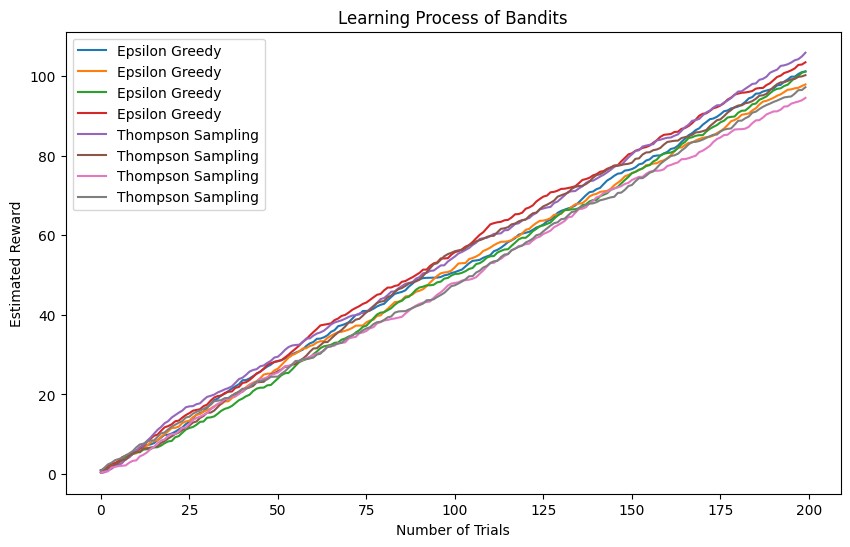

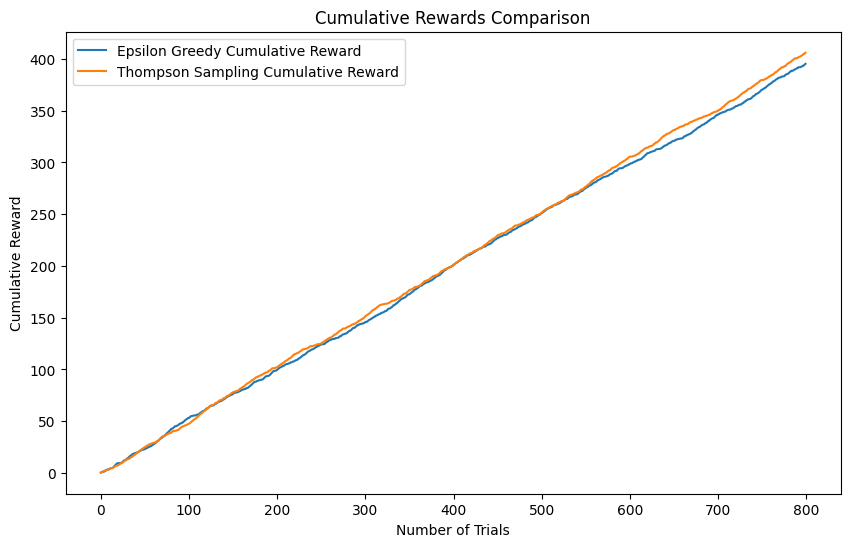

In [5]:
import matplotlib.pyplot as plt
import numpy as np

class Visualization:
    def plot1(self, learning_processes_dict):
        """
        Visualizes the learning process for each algorithm.

        Args:
            learning_processes_dict (dict): Dictionary containing lists of learning processes
                                            for each algorithm.
        """
        plt.figure(figsize=(10, 6))
        for label, processes in learning_processes_dict.items():
            for process in processes:
                plt.plot(process, label=f'{label}')
        plt.title('Learning Process of Bandits')
        plt.xlabel('Number of Trials')
        plt.ylabel('Estimated Reward')
        plt.legend()
        plt.show()

    def plot2(self, rewards_dict):
        """
        Visualizes cumulative rewards for each algorithm.

        Args:
            rewards_dict (dict): Dictionary containing lists of rewards for each algorithm.
        """
        plt.figure(figsize=(10, 6))
        for label, rewards in rewards_dict.items():
            cumulative_rewards = np.cumsum(rewards)
            plt.plot(cumulative_rewards, label=f'{label} Cumulative Reward')
        plt.title('Cumulative Rewards Comparison')
        plt.xlabel('Number of Trials')
        plt.ylabel('Cumulative Reward')
        plt.legend()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Assuming that learning_processes_eg and learning_processes_ts are lists of lists
    # containing the learning process data from the EpsilonGreedyBandit and ThompsonSampling instances
    learning_processes_eg = [np.random.rand(200).cumsum() for _ in range(4)]  # Example data
    learning_processes_ts = [np.random.rand(200).cumsum() for _ in range(4)]  # Example data

    # Rewards data
    rewards_eg = [np.random.rand(200) for _ in range(4)]
    rewards_ts = [np.random.rand(200) for _ in range(4)]

    # Initialize visualization and plot data
    visualization = Visualization()
    visualization.plot1({'Epsilon Greedy': learning_processes_eg, 'Thompson Sampling': learning_processes_ts})
    visualization.plot2({'Epsilon Greedy': rewards_eg, 'Thompson Sampling': rewards_ts})


In [6]:
import pandas as pd

# Load the CSV files into DataFrames
epsilon_greedy_df = pd.read_csv(os.getcwd()+'/data/epsilon_greedy.csv')
thompson_sampling_df = pd.read_csv(os.getcwd()+'/data/ThompsonSampling.csv')


In [7]:
print(epsilon_greedy_df)

       Bandit    Reward      Algorithm
0           2  2.223755  EpsilonGreedy
1           3  6.110486  EpsilonGreedy
2           0  0.841635  EpsilonGreedy
3           2  1.028168  EpsilonGreedy
4           0  1.046812  EpsilonGreedy
...       ...       ...            ...
19995       0  1.414023  EpsilonGreedy
19996       0  0.499047  EpsilonGreedy
19997       3  1.864765  EpsilonGreedy
19998       0  1.641340  EpsilonGreedy
19999       1  0.873279  EpsilonGreedy

[20000 rows x 3 columns]


In [8]:
print(thompson_sampling_df)

       Bandit    Reward         Algorithm
0           0  1.612515  ThompsonSampling
1           3  4.508692  ThompsonSampling
2           3  4.040195  ThompsonSampling
3           3  6.126781  ThompsonSampling
4           2  2.713644  ThompsonSampling
...       ...       ...               ...
19995       3  4.943411  ThompsonSampling
19996       3  5.372960  ThompsonSampling
19997       3  4.152150  ThompsonSampling
19998       3  3.551298  ThompsonSampling
19999       2  2.112221  ThompsonSampling

[20000 rows x 3 columns]


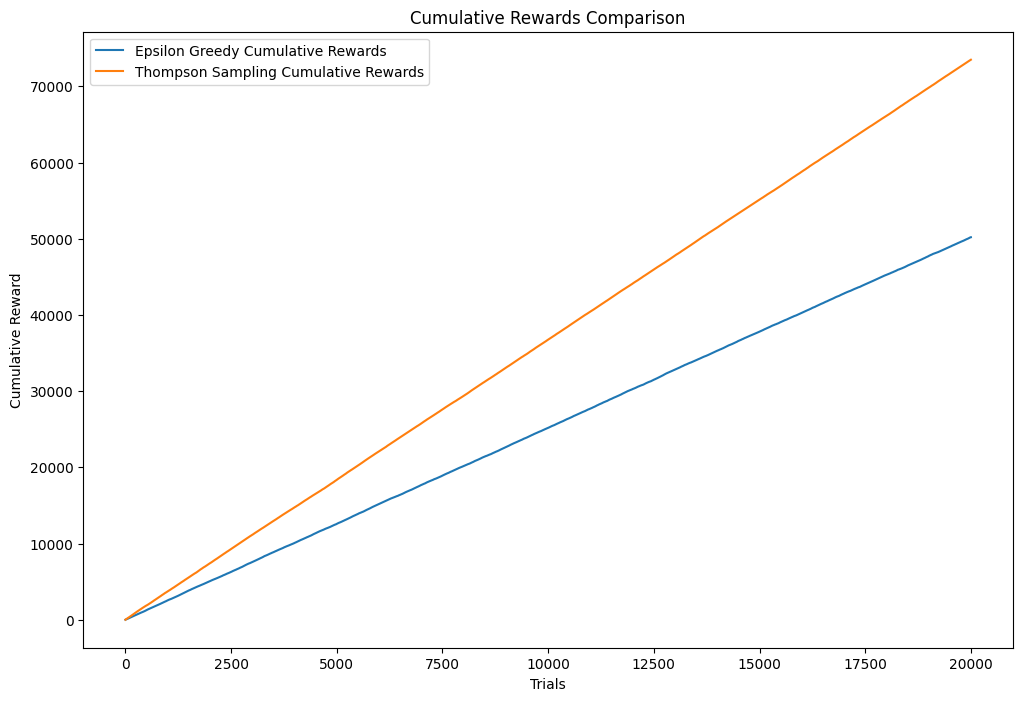

In [9]:
import matplotlib.pyplot as plt

def comparison(epsilon_greedy_cumulative_rewards, thompson_sampling_cumulative_rewards):
    """
    Compares cumulative rewards of Epsilon Greedy and Thompson Sampling algorithms.
    
    Args:
        epsilon_greedy_cumulative_rewards (pd.Series): Cumulative rewards for Epsilon Greedy.
        thompson_sampling_cumulative_rewards (pd.Series): Cumulative rewards for Thompson Sampling.
    """
    plt.figure(figsize=(12, 8))
    plt.plot(epsilon_greedy_cumulative_rewards, label='Epsilon Greedy Cumulative Rewards')
    plt.plot(thompson_sampling_cumulative_rewards, label='Thompson Sampling Cumulative Rewards')
    plt.title('Cumulative Rewards Comparison')
    plt.xlabel('Trials')
    plt.ylabel('Cumulative Reward')
    plt.legend()
    plt.show()

# Example usage:
# Assuming `epsilon_greedy_dd` and `thompson_sampling_dd` are your dataframes or series containing rewards
# You need to replace these with the actual data loading steps
epsilon_greedy_cumulative_rewards = epsilon_greedy_df['Reward'].cumsum()
thompson_sampling_cumulative_rewards = thompson_sampling_df['Reward'].cumsum()

# Call the comparison function
comparison(epsilon_greedy_cumulative_rewards, thompson_sampling_cumulative_rewards)


In [10]:
# After running experiments for both algorithms
print("Epsilon Greedy Cumulative Reward:", np.sum([reward['Reward'] for reward in epsilon_bandit.results]))


Epsilon Greedy Cumulative Reward: 50200.61839943896


In [11]:
print("Thompson Sampling Cumulative Reward:", np.sum([reward['Reward'] for reward in thompson_bandit.results]))

Thompson Sampling Cumulative Reward: 73497.57047095406


In [12]:

optimal_reward = max(epsilon_greedy_df['Reward'].max(), thompson_sampling_df['Reward'].max())

# Calculate cumulative regret for Epsilon Greedy
epsilon_greedy_df['Regret'] = optimal_reward - epsilon_greedy_df['Reward']
epsilon_greedy_cumulative_regret = epsilon_greedy_df['Regret'].cumsum()

# Calculate cumulative regret for Thompson Sampling
thompson_sampling_df['Regret'] = optimal_reward - thompson_sampling_df['Reward']
thompson_sampling_cumulative_regret = thompson_sampling_df['Regret'].cumsum()


In [13]:
print("Epsilon Greedy Cumulative Regret:", epsilon_greedy_cumulative_regret.iloc[-1])
print("Thompson Sampling Cumulative Regret:", thompson_sampling_cumulative_regret.iloc[-1])


Epsilon Greedy Cumulative Regret: 105724.77713933261
Thompson Sampling Cumulative Regret: 82427.82506781805
